In [1]:
from utils.load_results import *
from utils.plot_helpers import *

import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
datasets = ['(4,8)']*8
n_datasets = len(datasets)
paths = ['results/(4,8)_sample_scaling_10_balanced_True_vsf_1/', 
         'results/(4,8)_sample_scaling_10_balanced_False_vsf_1/',
         'results/(4,8)_sample_scaling_10_balanced_True_vsf_2/', 
         'results/(4,8)_sample_scaling_10_balanced_False_vsf_2/',
         'results/(4,8)_sample_scaling_10_balanced_True_vsf_3/', 
         'results/(4,8)_sample_scaling_10_balanced_False_vsf_3/',
         'results/(4,8)_sample_scaling_10_balanced_True_vsf_4/', 
         'results/(4,8)_sample_scaling_10_balanced_False_vsf_4/',]

## training

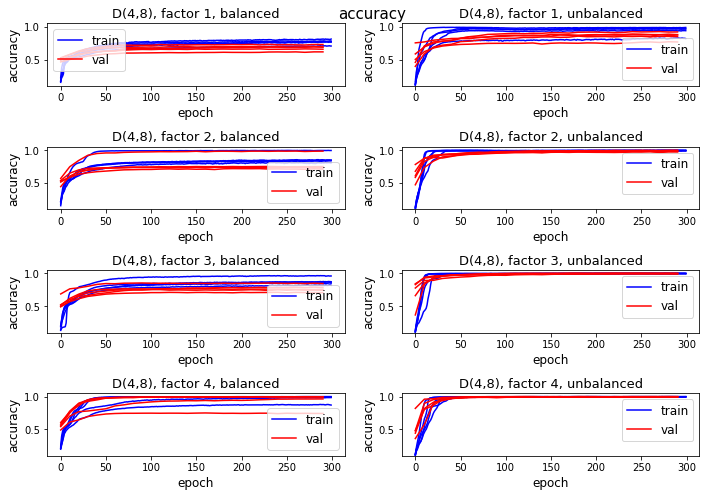

In [3]:
all_accuracies = load_accuracies(paths)
titles = ['D(4,8), factor' + vsf + b for vsf in [' 1', ' 2', ' 3', ' 4'] for b in [', balanced', ', unbalanced']]
plot_training_trajectory(all_accuracies['train_acc'], all_accuracies['val_acc'], plot_shape=(4,2),
                         plot_indices=(1, 2, 3, 4, 5, 6, 7, 8), ylim=(0.1,1.05), steps=(1,10), 
                         titles = titles)

## final accuracies

In [4]:
all_accuracies = load_accuracies(paths)
accuracies = [all_accuracies['train_acc'], all_accuracies['val_acc'], 
              all_accuracies['zs_acc_objects'], all_accuracies['zs_acc_abstraction']]

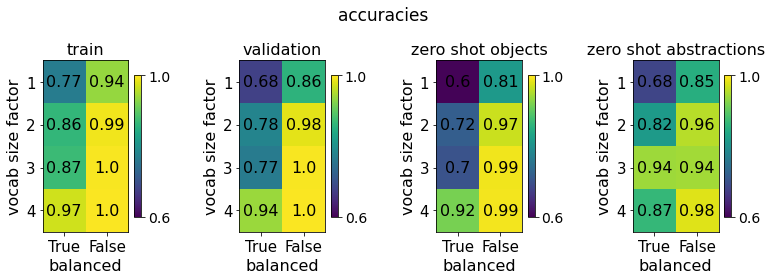

In [12]:
plot_heatmap_different_vs(accuracies, 'mean', plot_dims=(1, 4), ylims=[0.6, 1.0], figsize=(11, 3.5),
                          suptitle='accuracies', fontsize=16, suptitle_position=1.1)

## entropy scores

In [9]:
entropy_scores = load_entropies(paths)
entropies = [entropy_scores['NI'], entropy_scores['effectiveness'], entropy_scores['consistency']]

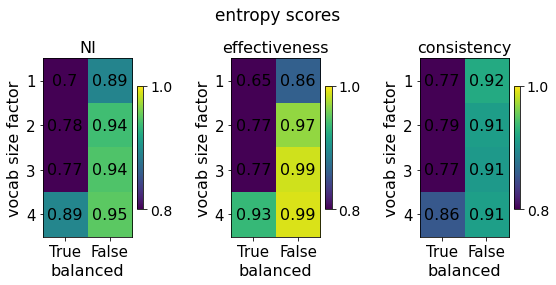

In [10]:
plot_heatmap_different_vs(entropies, 'mean', plot_dims=(1,3), ylims=(0.8, 1.0), figsize=(8, 4), 
                          titles = ('NI', 'effectiveness', 'consistency'), suptitle='entropy scores', 
                          fontsize=16, suptitle_position=0.98)

In [23]:
MI_dict = {}
vs_list = []
sampling_list = []
run_list = []
level_list = []
value_list_NMI = []
value_list_effectiveness = []
value_list_consistency = []
value_list_ml = []

for v, vocab_size in enumerate([1, 2, 3, 4]):
    for r, run in enumerate(range(5)):
        for s, sampling in enumerate(['balanced', 'unbalanced']):
            
            dataset_idx = v*2 + s
            path = paths[dataset_idx]
            scores = pickle.load(open(path + 'standard/' + str(run) + '/entropy_scores.pkl', 'rb'))
            
            for l, level in enumerate([1, 2, 3, 4]):

                    vs_list.append(vocab_size)
                    sampling_list.append(sampling)
                    level_list.append(level)
                    run_list.append(run)
                    value_list_NMI.append(scores['normalized_mutual_info_hierarchical'][l])
                    value_list_effectiveness.append(scores['effectiveness_hierarchical'][l])
                    value_list_consistency.append(scores['consistency_hierarchical'][l])
            
MI_dict['vocab size'] = vs_list
MI_dict['sampling'] = sampling_list
MI_dict['level'] = level_list
MI_dict['run'] = run_list
MI_dict['NI'] = value_list_NMI
MI_dict['effectiveness'] = value_list_effectiveness
MI_dict['consistency'] = value_list_consistency


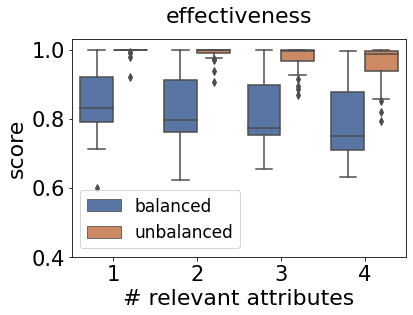

In [26]:
ax = sns.boxplot(x='level', y='effectiveness', data=MI_dict, hue='sampling', palette='deep')
plt.title('effectiveness', fontsize=22, y=1.05)
plt.xlabel('# relevant attributes', fontsize=22)
plt.ylabel('score', fontsize=22)
plt.xticks(ticks=[0,1,2,3], labels=[1,2,3,4], fontsize=21)
plt.yticks(ticks=[0.4,0.6,0.8,1.0], fontsize=21)
plt.legend(fontsize=17)
plt.ylim([0.4,1.03])
plt.show()

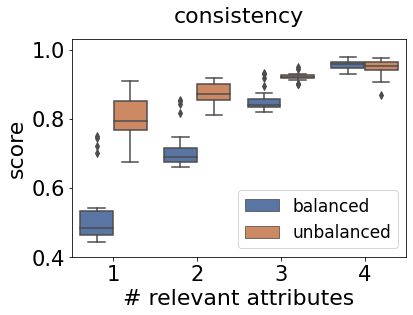

In [27]:
ax = sns.boxplot(x='level', y='consistency', data=MI_dict, hue='sampling', palette='deep')
plt.title('consistency', fontsize=22, y=1.05)
plt.xlabel('# relevant attributes', fontsize=22)
plt.ylabel('score', fontsize=22)
plt.xticks(ticks=[0,1,2,3], labels=[1,2,3,4], fontsize=21)
plt.yticks(ticks=[0.4,0.6,0.8,1.0], fontsize=21)
plt.legend(fontsize=17)
plt.ylim([0.4,1.03])
plt.show()

## compositionality

In [3]:
topsim, posdis, bosdis = np.zeros((n_datasets, 5)), np.zeros((n_datasets, 5)), np.zeros((n_datasets, 5))
topsim_concrete, posdis_concrete, bosdis_concrete = np.zeros((n_datasets, 5)), np.zeros((n_datasets, 5)), np.zeros((n_datasets, 5))

for d, dataset in enumerate(datasets): 
    for run in range(5):
        
        topsim_score = pickle.load(open(paths[d] + 'standard/' + str(run) + '/topsim_final.pkl', 'rb'))
        disent_score = pickle.load(open(paths[d] + 'standard/' + str(run) + '/posdis_bosdis.pkl', 'rb'))
        topsim[d, run] = topsim_score['topsim_train']
        posdis[d, run] = disent_score['posdis']
        bosdis[d, run] = disent_score['bosdis']
        topsim_concrete[d, run] = topsim_score['topsim_max_relevance_train']
        posdis_concrete[d, run] = disent_score['posdis_max_relevance']
        bosdis_concrete[d, run] = disent_score['bosdis_max_relevance']

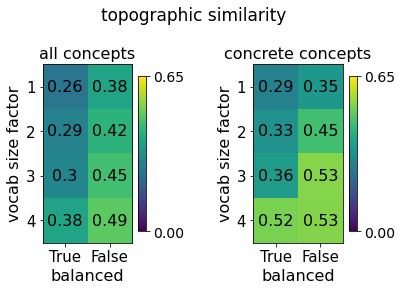

In [4]:
plot_heatmap_different_vs([topsim, topsim_concrete], 'mean', plot_dims=(1,2), ylims=[0.0,0.65], figsize=(6,4), 
                          titles=['all concepts', 'concrete concepts'], fontsize=16, 
                          suptitle='topographic similarity', suptitle_position=1.)

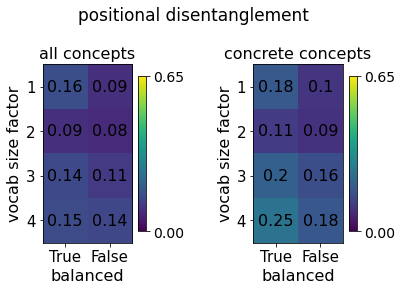

In [20]:
plot_heatmap_different_vs([posdis, posdis_concrete], 'mean', plot_dims=(1,2), ylims=[0.0,0.65], figsize=(6,4), 
                          titles=['all concepts', 'concrete concepts'], fontsize=16, 
                          suptitle='positional disentanglement', suptitle_position=1.)

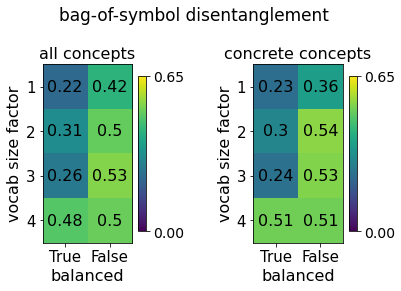

In [18]:
plot_heatmap_different_vs([bosdis, bosdis_concrete], 'mean', plot_dims=(1,2), ylims=[0.0,0.65], figsize=(6,4), 
                          titles=['all concepts', 'concrete concepts'], fontsize=16, 
                          suptitle='bag-of-symbol disentanglement', suptitle_position=1.)